# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]
sinasc

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


In [5]:
sinasc.groupby('munResNome').agg([('média', 'mean')])

,IDADEMAE,IDADEPAI
,média,média
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
sinasc_raw['DTNASC'].head()

,DTNASC
0,2019-02-19
1,2019-02-21
2,2019-02-25
3,2019-03-20
4,2019-03-23


In [7]:
sinasc2 = sinasc_raw[sinasc_raw['DTNASC'] == '2019-10-15']

In [8]:
sinasc2['DTNASC'].head()

,DTNASC
14518,2019-10-15
14519,2019-10-15
14520,2019-10-15
14559,2019-10-15
14560,2019-10-15


In [9]:
sinasc2.shape

(77, 69)

In [10]:
sinasc2['ESCMAE'].unique()

array(['12 anos ou mais', '8 a 11 anos', '4 a 7 anos', nan], dtype=object)

In [11]:
sinasc2 = sinasc2[['DTNASC', 'SEXO',  'ESCMAE', 'PESO']]

In [12]:
sinasc2.head()

,DTNASC,SEXO,ESCMAE,PESO
14518,2019-10-15,Feminino,12 anos ou mais,3435
14519,2019-10-15,Masculino,8 a 11 anos,3730
14520,2019-10-15,Masculino,12 anos ou mais,3220
14559,2019-10-15,Masculino,12 anos ou mais,3535
14560,2019-10-15,Masculino,8 a 11 anos,3055


In [13]:
sinasc_groupby = sinasc2.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()

In [14]:
sinasc_groupby

SEXO,Feminino,Masculino
ESCMAE,,
12 anos ou mais,3337.25,3144.166667
4 a 7 anos,3296.25,3266.250000
8 a 11 anos,3290.35,3150.500000


<Axes: xlabel='ESCMAE'>

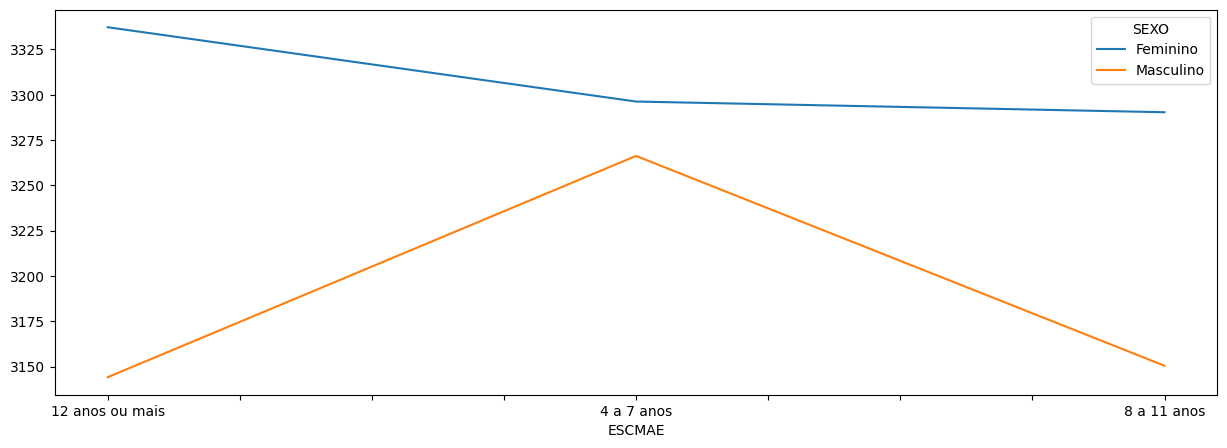

In [15]:
sinasc_groupby.plot(figsize=[15,5])

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [16]:
sinasc3 = sinasc_raw[['ESCMAE','IDADEPAI','IDADEMAE' ,'munResNome']]
sinasc3

,ESCMAE,IDADEPAI,IDADEMAE,munResNome
0,8 a 11 anos,26.0,19,Alta Floresta D'Oeste
1,8 a 11 anos,24.0,29,Alta Floresta D'Oeste
2,8 a 11 anos,32.0,37,Alta Floresta D'Oeste
3,12 anos ou mais,24.0,30,Alto Alegre dos Parecis
4,8 a 11 anos,27.0,30,Alta Floresta D'Oeste
...,...,...,...,...
27023,12 anos ou mais,35.0,32,Vilhena
27024,8 a 11 anos,NaN,19,Chupinguaia
27025,8 a 11 anos,30.0,24,Vilhena
27026,8 a 11 anos,24.0,21,Vilhena


In [17]:
sinasc3_gb = sinasc3.groupby(['munResNome'])
sinasc3_gb_agg = sinasc3_gb.agg(
    {'ESCMAE':[('contagem', 'count')],
     'IDADEPAI': [('média', 'mean'),('mínimo', 'min'),('máximo', 'max')],
     'IDADEMAE': [('média', 'mean'),('mínimo', 'min'),('máximo', 'max')]
     }
)

In [18]:
sinasc3_gb_agg = sinasc3_gb_agg.sort_values(('ESCMAE', 'contagem'), ascending=True)

In [19]:
sinasc3_gb_agg

ESCMAE   IDADEPAI                 IDADEMAE         \
                          contagem      média mínimo máximo      média mínimo   
munResNome                                                                      
Município ignorado - RO          1  22.000000   22.0   22.0  24.000000     24   
Castanheiras                    32  30.392857   17.0   43.0  27.281250     17   
Pimenteiras do Oeste            40  35.600000   25.0   45.0  25.075000     14   
Primavera de Rondônia           43  31.888889   21.0   44.0  27.023256     16   
Parecis                         44  32.473684   18.0   61.0  26.454545     16   
Rio Crespo                      49  28.000000   28.0   28.0  26.660000     16   
São Felipe D'Oeste              54  31.395833   18.0   57.0  26.481481     17   
Teixeirópolis                   64  31.500000   20.0   67.0  26.031250     16   
Cacaulândia                     74  36.333333   28.0   50.0  25.546667     16   
Cabixi                          80  34.333333   19.0   47.0  26.037500     13   
Vale do Paraíso                 81  29.976744   18.0   51.0  25.679012     14   
Ministro Andreazza              84  33.849315   21.0   55.0  27.904762     17   
Vale do Anari                   92  34.000000   23.0   58.0  26.096774     14   
Theobroma                       95  30.083333   23.0   45.0  25.536082     15   
Novo Horizonte do Oeste         98  31.588235   20.0   56.0  26.938776     15   
Santa Luzia D'Oeste             98  30.703297   18.0   53.0  26.121212     15   
Nova União                     103  31.371429   18.0   53.0  26.894231     16   
Itapuã do Oeste                107  42.500000   25.0   73.0  26.064220     15   
Governador Jorge Teixeira      111  29.222222   22.0   37.0  24.401786     13   
Corumbiara                     127  32.470588   21.0   52.0  24.716535     15   
Alto Alegre dos Parecis        151  29.179104   16.0   50.0  24.844156     14   
Chupinguaia                    160  29.629630   20.0   46.0  25.333333     13   
Mirante da Serra               164  32.154762   20.0   56.0  26.304878     14   
Campo Novo de Rondônia         164  30.500000   21.0   40.0  24.825301     13   
Seringueiras                   167  30.500000   20.0   47.0  24.910714     14   
Urupá                          168  31.008929   17.0   48.0  26.688235     15   
Monte Negro                    188  34.678571   20.0   55.0  25.648241     14   
Alvorada D'Oeste               202  30.757282   17.0   52.0  25.770732     15   
Cujubim                        203  31.400000   19.0   44.0  24.482927     14   
Colorado do Oeste              213  34.354839   23.0   53.0  27.602804     15   
Alto Paraíso                   226  28.833333   21.0   49.0  24.960177     11   
Costa Marques                  228  30.613636   17.0   60.0  24.412017     12   
Cerejeiras                     235  31.652778   19.0   52.0  27.240506     15   
Nova Brasilândia D'Oeste       259  30.520833   20.0   48.0  26.222222     15   
Presidente Médici              300  30.150754   16.0   64.0  25.796053     14   
São Francisco do Guaporé       301  31.638889   19.0   54.0  25.660066     14   
Candeias do Jamari             332  29.894737   21.0   41.0  25.243323     14   
São Miguel do Guaporé          352  32.666667   19.0   60.0  25.926346     14   
Alta Floresta D'Oeste          360  29.548701   17.0   58.0  25.991826     14   
Nova Mamoré                    430  31.692308   19.0   43.0  25.326389     14   
Espigão D'Oeste                450  31.198113   16.0   86.0  26.093333     14   
Machadinho D'Oeste             494  31.326923   17.0   53.0  25.480000     13   
Buritis                        579  30.812500   18.0   49.0  25.559177     14   
Pimenta Bueno                  615  29.745174   16.0   70.0  25.199675     13   
Ouro Preto do Oeste            629  31.233244   17.0   60.0  26.375594     14   
Guajará-Mirim                  776  30.470588   19.0   44.0  25.462228     13   
Jaru                           876  32.197183   19.0   62.0

In [50]:
sinasc3_gb_agg.iloc[1].to_frame().T

ESCMAE   IDADEPAI                IDADEMAE              
             contagem      média mínimo máximo     média mínimo máximo
Castanheiras     32.0  30.392857   17.0   43.0  27.28125   17.0   39.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [20]:
sinasc_marco = sinasc_raw[sinasc_raw['DTNASC'].str.contains('-03-', na=False)]

In [25]:
sinasc_marco.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [27]:
sinasc_marco['DTNASC'].unique()

array(['2019-03-20', '2019-03-23', '2019-03-27', '2019-03-11',
       '2019-03-12', '2019-03-18', '2019-03-28', '2019-03-19',
       '2019-03-26', '2019-03-07', '2019-03-29', '2019-03-01',
       '2019-03-02', '2019-03-03', '2019-03-13', '2019-03-14',
       '2019-03-15', '2019-03-16', '2019-03-21', '2019-03-25',
       '2019-03-31', '2019-03-04', '2019-03-06', '2019-03-05',
       '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-22',
       '2019-03-24', '2019-03-17', '2019-03-30'], dtype=object)

In [29]:
sinasc4 = sinasc_marco.groupby('munResNome')[['QTDFILVIVO', 'ESCMAE', 'IDADEPAI']]

In [31]:
sinasc4_gb_agg = sinasc4.agg(
    {'ESCMAE':[('contagem', 'count')],
     'QTDFILVIVO': [('média', 'mean'),('mínimo', 'min'),('máximo', 'max')],
     'IDADEPAI': [('média', 'mean'),('mínimo', 'min'),('máximo', 'max')]
     }
)

In [32]:
sinasc4_gb_agg = sinasc4_gb_agg.sort_values(('ESCMAE', 'contagem'), ascending=True)

In [33]:
sinasc4_gb_agg

ESCMAE QTDFILVIVO                 IDADEPAI         \
                          contagem      média mínimo máximo      média mínimo   
munResNome                                                                      
Teixeirópolis                    3   0.333333    0.0    1.0  27.000000   22.0   
Castanheiras                     4   1.750000    1.0    3.0  36.000000   32.0   
Novo Horizonte do Oeste          5   1.200000    1.0    2.0  30.400000   24.0   
Primavera de Rondônia            5   1.200000    0.0    2.0  32.750000   27.0   
São Felipe D'Oeste               5   0.000000    0.0    0.0  29.250000   27.0   
Ministro Andreazza               6   1.166667    0.0    3.0  38.000000   27.0   
Parecis                          6   1.833333    1.0    5.0  30.000000   24.0   
Pimenteiras do Oeste             6   1.000000    0.0    2.0        NaN    NaN   
Cabixi                           6   0.833333    0.0    3.0        NaN    NaN   
Nova União                       7   0.571429    0.0    1.0  27.333333   26.0   
Santa Luzia D'Oeste              7   0.428571    0.0    2.0  27.142857   19.0   
Theobroma                        8   1.125000    0.0    2.0  28.500000   26.0   
Itapuã do Oeste                  8   1.285714    0.0    3.0  39.000000   39.0   
Mirante da Serra                 9   1.000000    0.0    2.0  31.000000   30.0   
Rio Crespo                       9   1.000000    0.0    3.0        NaN    NaN   
Alto Alegre dos Parecis         10   0.888889    0.0    2.0  29.222222   21.0   
Governador Jorge Teixeira       10   0.555556    0.0    2.0        NaN    NaN   
Cacaulândia                     10   1.200000    0.0    4.0        NaN    NaN   
Vale do Anari                   11   0.818182    0.0    2.0  32.000000   30.0   
Corumbiara                      12   0.909091    0.0    3.0  37.000000   37.0   
Campo Novo de Rondônia          12   1.285714    0.0    2.0  29.375000   21.0   
Vale do Paraíso                 13   0.583333    0.0    2.0  30.000000   19.0   
Urupá                           14   0.928571    0.0    2.0  30.230769   22.0   
Cerejeiras                      16   0.875000    0.0    2.0  31.222222   26.0   
Cujubim                         17   1.294118    0.0    5.0  39.000000   39.0   
Chupinguaia                     18   1.055556    0.0    4.0  29.000000   20.0   
Monte Negro                     19   0.700000    0.0    3.0  35.000000   22.0   
Colorado do Oeste               19   1.000000    0.0    4.0  38.750000   27.0   
Seringueiras                    19   1.000000    0.0    2.0  30.333333   26.0   
Nova Brasilândia D'Oeste        20   0.947368    0.0    3.0  29.666667   25.0   
Alvorada D'Oeste                22   1.000000    0.0    3.0  33.400000   26.0   
Alto Paraíso                    22   1.285714    0.0    3.0  26.000000   23.0   
Costa Marques                   24   1.208333    0.0    4.0  25.000000   19.0   
Presidente Médici               28   0.724138    0.0    3.0  32.928571   24.0   
São Francisco do Guaporé        31   1.161290    0.0    6.0  29.500000   19.0   
Alta Floresta D'Oeste           31   0.903226    0.0    4.0  30.125000   20.0   
Candeias do Jamari              33   1.250000    0.0    4.0  25.000000   25.0   
São Miguel do Guaporé           41   1.000000    0.0    4.0  33.666667   30.0   
Machadinho D'Oeste              44   1.000000    0.0    6.0  32.000000   23.0   
Espigão D'Oeste                 44   1.386364    0.0    6.0  30.666667   19.0   
Nova Mamoré                     52   1.360000    0.0    6.0  31.272727   19.0   
Buritis                         59   1.421053    0.0    4.0  32.115385   18.0   
Pimenta Bueno                   62   0.836066    0.0    4.0  29.611111   17.0   
Ouro Preto do Oeste             67   1.014925    0.0    5.0  30.175000   19.0   
Rolim de Moura                  69   0.724638    0.0    5.0  31.257576   19.0   
Guajará-Mirim                   74   1.534247    0.0    8.0  34.500000   26.0   
Jaru                            80   1.025641    0.0    5.0

In [48]:
sinasc4_gb_agg.iloc[0].to_frame().T

ESCMAE QTDFILVIVO               IDADEPAI              
              contagem      média mínimo máximo    média mínimo máximo
Teixeirópolis      3.0   0.333333    0.0    1.0     27.0   22.0   32.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Percebi que a média da idade dos pais comparada a a média da idade das mães por múnicipo em quase todos os casos é maior.

In [53]:
sinasc3_gb_agg = sinasc3_gb_agg.sort_values(('IDADEPAI', 'média'), ascending=True)

In [56]:
sinasc3_gb_agg

ESCMAE   IDADEPAI                 IDADEMAE         \
                          contagem      média mínimo máximo      média mínimo   
munResNome                                                                      
Município ignorado - RO          1  22.000000   22.0   22.0  24.000000     24   
Rio Crespo                      49  28.000000   28.0   28.0  26.660000     16   
Alto Paraíso                   226  28.833333   21.0   49.0  24.960177     11   
Alto Alegre dos Parecis        151  29.179104   16.0   50.0  24.844156     14   
Governador Jorge Teixeira      111  29.222222   22.0   37.0  24.401786     13   
Alta Floresta D'Oeste          360  29.548701   17.0   58.0  25.991826     14   
Chupinguaia                    160  29.629630   20.0   46.0  25.333333     13   
Pimenta Bueno                  615  29.745174   16.0   70.0  25.199675     13   
Candeias do Jamari             332  29.894737   21.0   41.0  25.243323     14   
Vale do Paraíso                 81  29.976744   18.0   51.0  25.679012     14   
Theobroma                       95  30.083333   23.0   45.0  25.536082     15   
Presidente Médici              300  30.150754   16.0   64.0  25.796053     14   
Rolim de Moura                 916  30.360479   16.0   69.0  26.600863     14   
Castanheiras                    32  30.392857   17.0   43.0  27.281250     17   
Guajará-Mirim                  776  30.470588   19.0   44.0  25.462228     13   
Campo Novo de Rondônia         164  30.500000   21.0   40.0  24.825301     13   
Seringueiras                   167  30.500000   20.0   47.0  24.910714     14   
Nova Brasilândia D'Oeste       259  30.520833   20.0   48.0  26.222222     15   
Costa Marques                  228  30.613636   17.0   60.0  24.412017     12   
Santa Luzia D'Oeste             98  30.703297   18.0   53.0  26.121212     15   
Alvorada D'Oeste               202  30.757282   17.0   52.0  25.770732     15   
Buritis                        579  30.812500   18.0   49.0  25.559177     14   
Cacoal                        1370  30.931854   17.0   66.0  26.890102     14   
Urupá                          168  31.008929   17.0   48.0  26.688235     15   
Ji-Paraná                     2155  31.132239   15.0   63.0  26.361137     12   
Espigão D'Oeste                450  31.198113   16.0   86.0  26.093333     14   
Ouro Preto do Oeste            629  31.233244   17.0   60.0  26.375594     14   
Machadinho D'Oeste             494  31.326923   17.0   53.0  25.480000     13   
Nova União                     103  31.371429   18.0   53.0  26.894231     16   
São Felipe D'Oeste              54  31.395833   18.0   57.0  26.481481     17   
Cujubim                        203  31.400000   19.0   44.0  24.482927     14   
Teixeirópolis                   64  31.500000   20.0   67.0  26.031250     16   
Novo Horizonte do Oeste         98  31.588235   20.0   56.0  26.938776     15   
São Francisco do Guaporé       301  31.638889   19.0   54.0  25.660066     14   
Cerejeiras                     235  31.652778   19.0   52.0  27.240506     15   
Nova Mamoré                    430  31.692308   19.0   43.0  25.326389     14   
Primavera de Rondônia           43  31.888889   21.0   44.0  27.023256     16   
Mirante da Serra               164  32.154762   20.0   56.0  26.304878     14   
Jaru                           876  32.197183   19.0   62.0  25.982974     12   
Porto Velho                   8268  32.352679   16.0   65.0  26.312670     12   
Ariquemes                     1726  32.466667   20.0   51.0  25.607866     13   
Corumbiara                     127  32.470588   21.0   52.0  24.716535     15   
Parecis                         44  32.473684   18.0   61.0  26.454545     16   
São Miguel do Guaporé          352  32.666667   19.0   60.0  25.926346     14   
Ministro Andreazza              84  33.849315   21.0   55.0  27.904762     17   
Vale do Anari                   92  34.000000   23.0   58.0  26.096774     14   
Vilhena                       1582  34.152941   18.0   60.0